##### The Project seeks to predict the closing stock price of Tata Motors using 12 months historical data
##### Source: Yahoo Finace

In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data source\tatamotor_fin.csv")

In [3]:
# To view the top end of the dataset
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-06,220.600006,223.250000,220.300003,222.199997,221.087143,1457680
1,2023-03-08,222.199997,224.550003,220.850006,222.750000,221.634399,1376909
2,2023-03-09,223.199997,224.500000,219.149994,219.699997,218.599670,846157
3,2023-03-10,221.149994,222.199997,219.500000,221.149994,220.042404,1662994
4,2023-03-13,221.750000,222.399994,214.449997,215.149994,214.072449,1216664
5,2023-03-14,216.250000,216.250000,211.100006,211.600006,210.540237,1260125
6,2023-03-15,213.649994,215.000000,207.350006,208.100006,207.057770,1551401
7,2023-03-16,208.699997,213.550003,204.800003,212.350006,211.286484,2949061
8,2023-03-17,213.649994,215.949997,210.699997,213.550003,212.480469,1607787
9,2023-03-20,210.000000,212.750000,208.449997,211.399994,210.341232,2252848


In [4]:
# To check for number of rows and columns
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 245 rows and 7 columns


In [5]:
# To check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [6]:
# To check for missing values in absolute terms in the dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# To get the categorial columns
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_col)

['Date']


In [8]:
# To get the numerical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(num_col)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [9]:
# To get the number of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

Date:245
Open:231
High:243
Low:235
Close:241
Adj Close:241
Volume:245


In [10]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

Date:['2023-03-06' '2023-03-08' '2023-03-09' '2023-03-10' '2023-03-13'
 '2023-03-14' '2023-03-15' '2023-03-16' '2023-03-17' '2023-03-20'
 '2023-03-21' '2023-03-22' '2023-03-23' '2023-03-24' '2023-03-27'
 '2023-03-28' '2023-03-29' '2023-03-31' '2023-04-03' '2023-04-05'
 '2023-04-06' '2023-04-10' '2023-04-11' '2023-04-12' '2023-04-13'
 '2023-04-17' '2023-04-18' '2023-04-19' '2023-04-20' '2023-04-21'
 '2023-04-24' '2023-04-25' '2023-04-26' '2023-04-27' '2023-04-28'
 '2023-05-02' '2023-05-03' '2023-05-04' '2023-05-05' '2023-05-08'
 '2023-05-09' '2023-05-10' '2023-05-11' '2023-05-12' '2023-05-15'
 '2023-05-16' '2023-05-17' '2023-05-18' '2023-05-19' '2023-05-22'
 '2023-05-23' '2023-05-24' '2023-05-25' '2023-05-26' '2023-05-29'
 '2023-05-30' '2023-05-31' '2023-06-01' '2023-06-02' '2023-06-05'
 '2023-06-06' '2023-06-07' '2023-06-08' '2023-06-09' '2023-06-12'
 '2023-06-13' '2023-06-14' '2023-06-15' '2023-06-16' '2023-06-19'
 '2023-06-20' '2023-06-21' '2023-06-22' '2023-06-23' '2023-06-26'
 '202

In [11]:
# To check for duplicates 
df.duplicated().sum()

0

In [12]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,120,39,8,47,166,169,54,138,143,114
Date,2023-08-31,2023-05-08,2023-03-17,2023-05-18,2023-11-08,2023-11-13,2023-05-29,2023-09-27,2023-10-05,2023-08-23
Open,404.0,247.149994,213.649994,265.049988,435.549988,445.799988,269.100006,417.5,415.75,405.899994
High,409.950012,262.899994,215.949997,270.950012,438.450012,448.049988,269.700012,421.649994,417.899994,406.700012
Low,396.100006,245.649994,210.699997,264.100006,434.25,443.399994,265.5,414.399994,410.549988,397.799988
Close,399.5,258.5,213.550003,267.850006,436.100006,444.0,266.700012,419.75,413.75,403.350006
Adj Close,399.5,257.205353,212.480469,266.508514,436.100006,444.0,265.364288,419.75,413.75,403.350006
Volume,2517239,8512510,1607787,3657943,1594075,1676602,1831893,1166533,2387758,2382771


##### After close review, the dataset seems good enough for EDA, as there are no NaN, no duplicates.
##### Next sectioon is on EDA and Univariate Analysis shall be conducted on the features

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

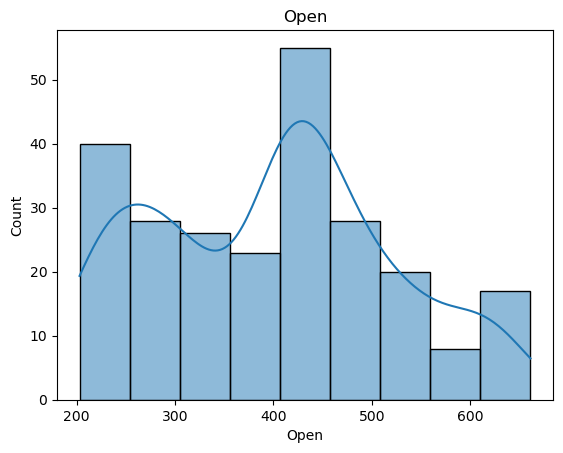

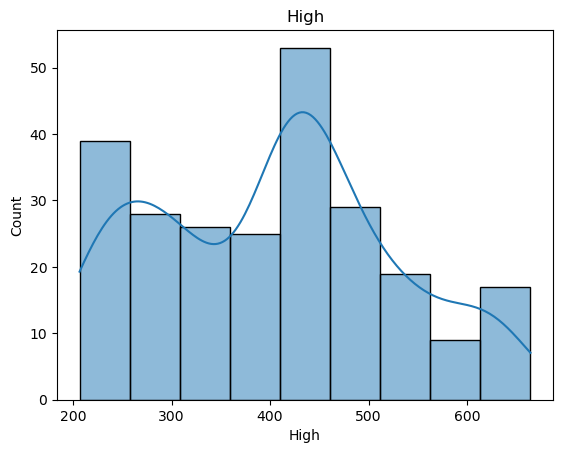

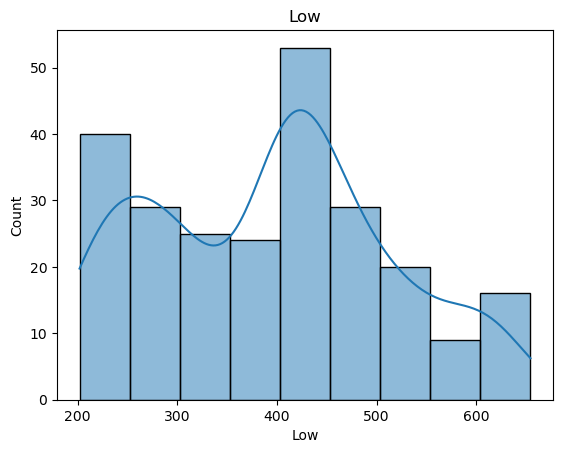

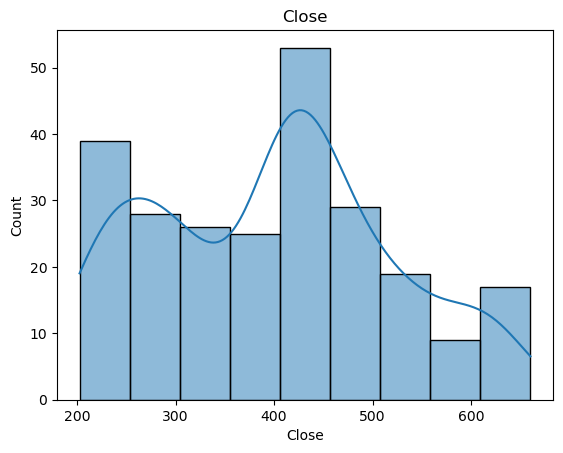

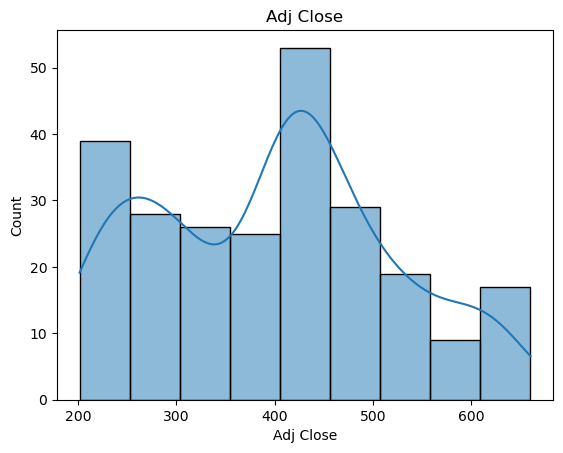

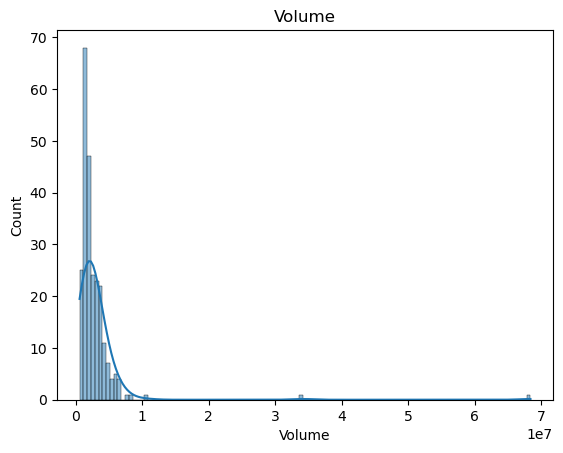

In [14]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O']
for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

##### This section deals with Bivariate Analysis looking at the relationship between the input numerical variables and the target variable. A Person-r correlation and a Scatterplot are adopted.

In [15]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [16]:
# To create a DataFrame for the correlation value and p-value as well as the target variable and other features that are numerical
corr_df = pd.DataFrame(columns = ['correlation(r)', 'p-value(p)'])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col!= 'Close':
        r, p = stats.pearsonr(df['Close'], df[col])
        r = round(r,3)
        p = round(p,3)
        corr_df.loc[col] = [r, p]
    corr_df 

In [17]:
corr_df

,correlation(r),p-value(p)
Open,0.999,0.000
High,1.000,0.000
Low,0.999,0.000
Adj Close,1.000,0.000
Volume,0.013,0.845


In [18]:
# Next, Scatterplot to be plotted aganist the target variable

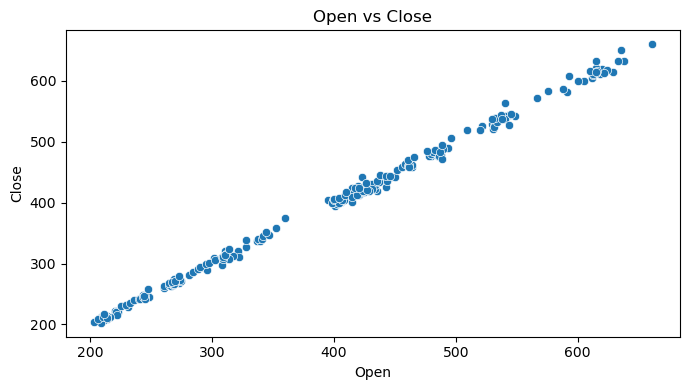

In [19]:

plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Open', y = 'Close')
plt.title('Open vs Close')
plt.tight_layout()
plt.show()

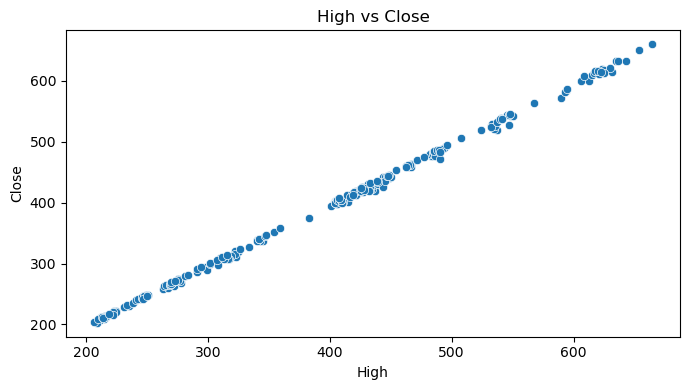

In [20]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'High', y = 'Close')
plt.title('High vs Close')
plt.tight_layout()
plt.show()

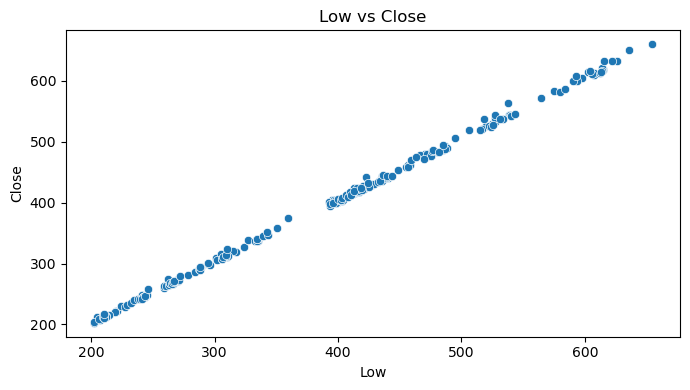

In [21]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Low', y = 'Close')
plt.title('Low vs Close')
plt.tight_layout()
plt.show()

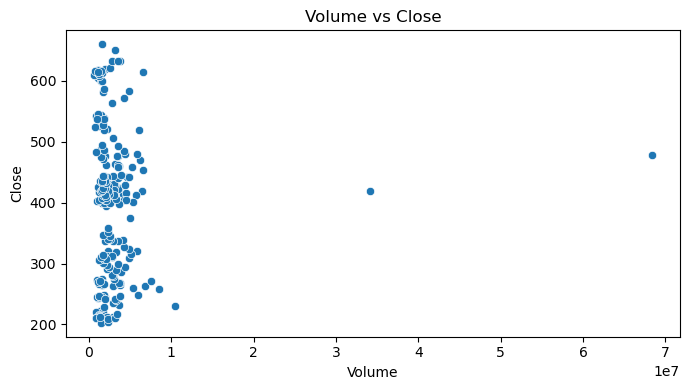

In [22]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Volume', y = 'Close')
plt.title('Volume vs Close')
plt.tight_layout()
plt.show()

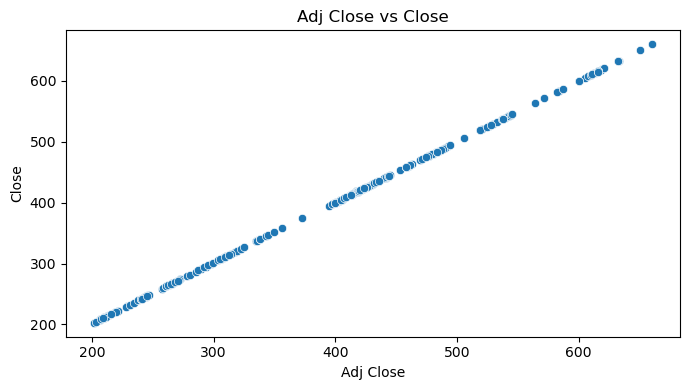

In [23]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'Adj Close', y = 'Close')
plt.title('Adj Close vs Close')
plt.tight_layout()
plt.show()

##### This Section deals with Multivariate Analysis. The Pairplot and Heatmap will be looked at.¶

In [24]:
# To call up all numerical variables in the dataset
my_df = df.select_dtypes(include = np.number)

In [25]:
my_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999274,0.999422,0.998761,0.998779,0.017211
High,0.999274,1.000000,0.999320,0.999520,0.999510,0.019855
Low,0.999422,0.999320,1.000000,0.999495,0.999516,0.006814
Close,0.998761,0.999520,0.999495,1.000000,0.999993,0.012543
Adj Close,0.998779,0.999510,0.999516,0.999993,1.000000,0.012148
Volume,0.017211,0.019855,0.006814,0.012543,0.012148,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


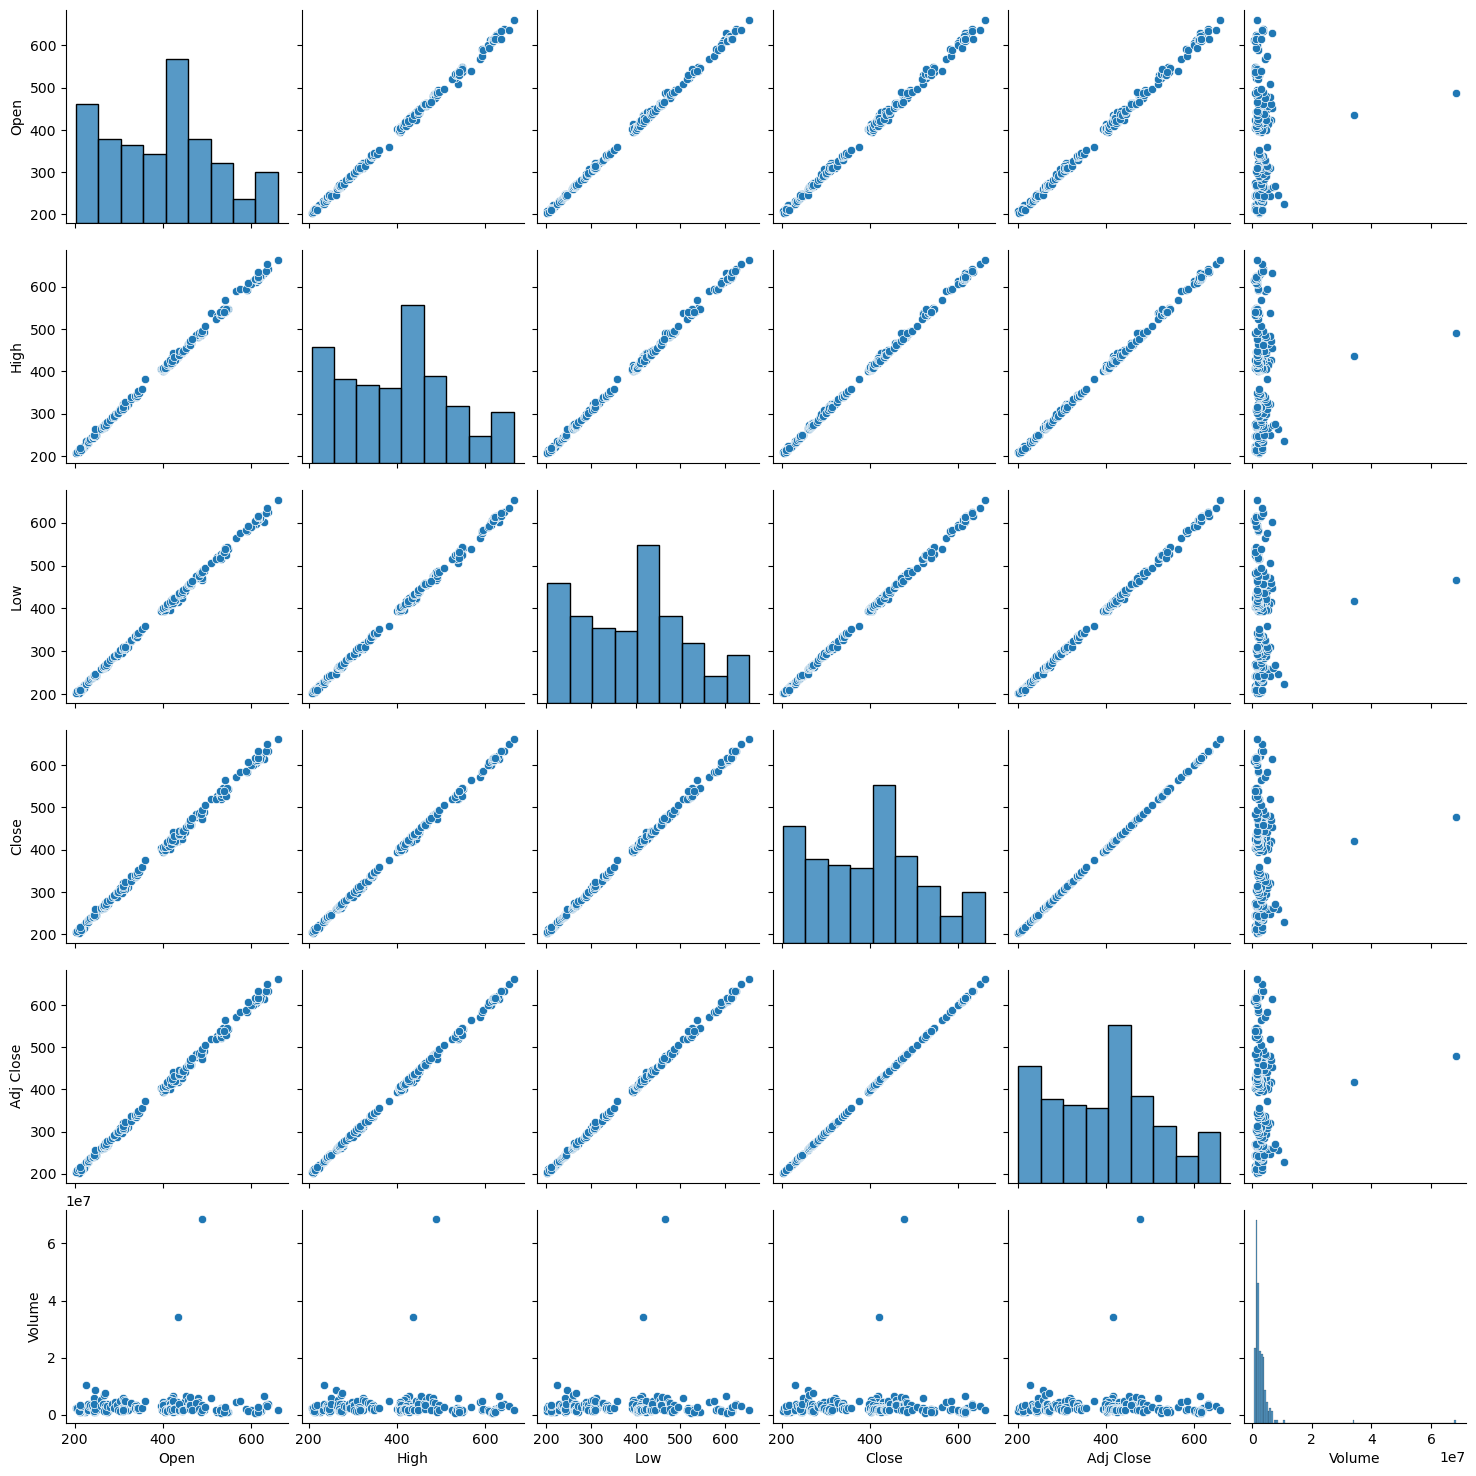

In [26]:
# Pairplot
sns.pairplot(data = my_df)

<Axes: >

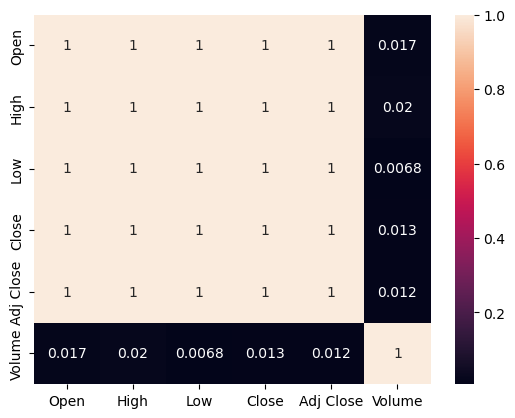

In [27]:
sns.heatmap(my_df.corr(), annot = True, cbar = True)

##### This section deals with data preprocessing for Machine learning¶

In [28]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


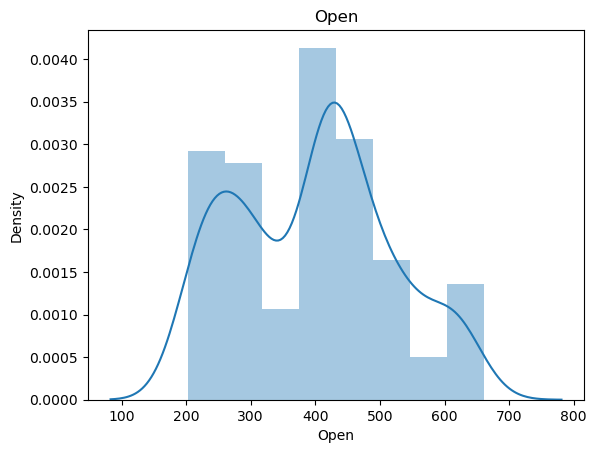

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


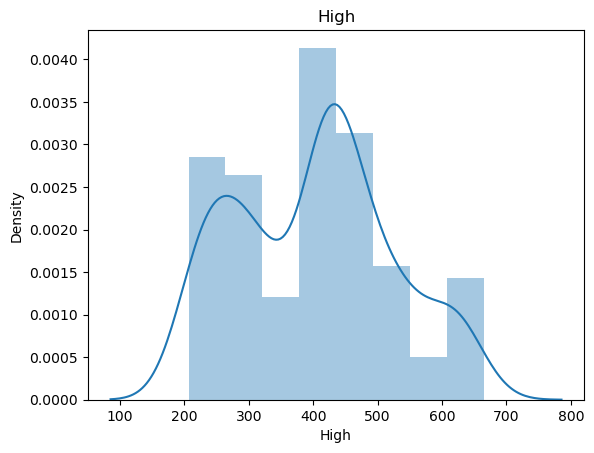

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


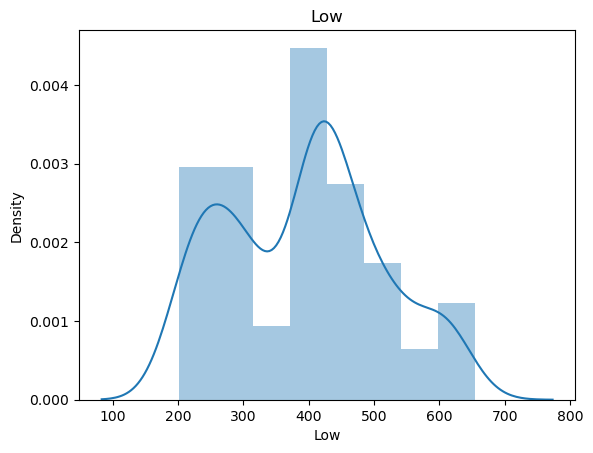

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


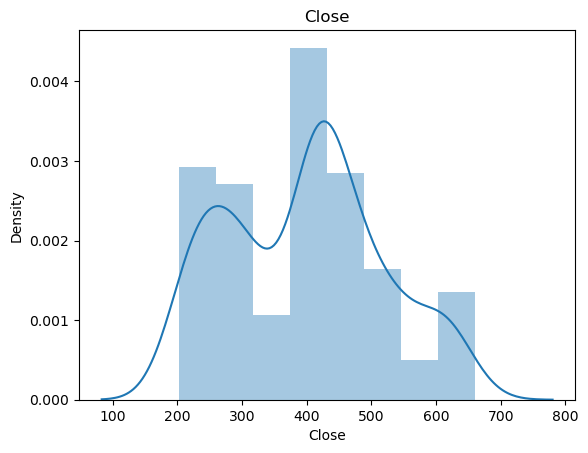

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


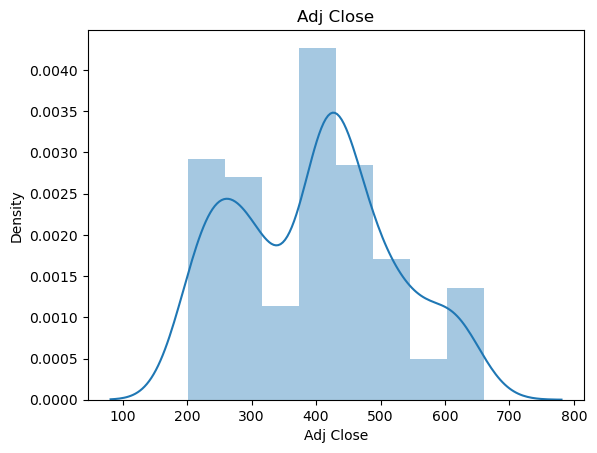

C:\Users\user\AppData\Local\Temp\ipykernel_3900\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


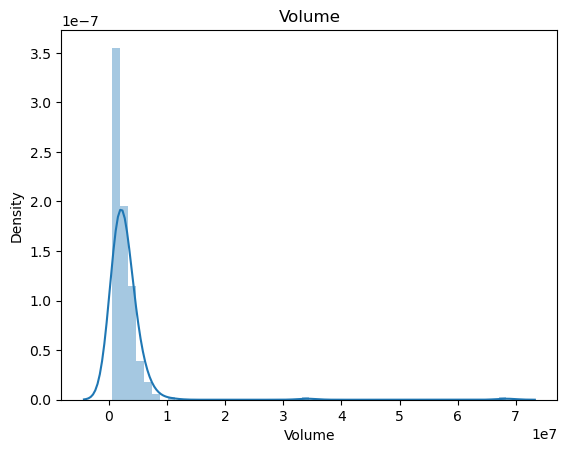

In [29]:
num_features = [num for num in df.columns if df[num].dtypes!='O']
for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [30]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

Open 0.14
High 0.15
Low 0.14
Close 0.15
Adj Close 0.15
Volume 10.98


In [31]:
# As part of feature selection based on stat and domain knowledge, the date coloumn is dropped
df.drop(['Date'], axis = 1, inplace = True)

In [32]:
# To split the DataFrame

x = df.drop('Close', axis = 1)
y = df[['Close']]

In [33]:
# To confirm the operation(split)
x.head(3)

,Open,High,Low,Adj Close,Volume
0,220.600006,223.250000,220.300003,221.087143,1457680
1,222.199997,224.550003,220.850006,221.634399,1376909
2,223.199997,224.500000,219.149994,218.599670,846157


In [34]:
# To confirm the operation (split)
y.head(3)

,Close
0,222.199997
1,222.750000
2,219.699997


In [35]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,Open,High,Low,Adj Close,Volume
0,0.038420,0.036580,0.040442,0.042514,0.012781
1,0.041912,0.039419,0.041657,0.043707,0.011589
2,0.044095,0.039310,0.037901,0.037091,0.003762
3,0.039620,0.034287,0.038674,0.040237,0.015809
4,0.040930,0.034724,0.027514,0.027222,0.009226
...,...,...,...,...,...
240,0.900349,0.935794,0.913702,0.941576,0.032408
241,0.949574,0.953265,0.937238,0.938415,0.046410
242,0.938660,0.938524,0.929061,0.938851,0.043624
243,0.944008,0.976960,0.957901,0.978309,0.037427


##### This is the Machine Learning section¶

In [37]:
# Next is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
# The display of the train_split
x_train

,Open,High,Low,Adj Close,Volume
229,0.877429,0.887202,0.866298,0.869309,0.012563
209,0.744379,0.740118,0.744530,0.746138,0.008326
96,0.482318,0.481328,0.469392,0.470041,0.085853
168,0.523357,0.525005,0.524530,0.527266,0.017876
84,0.272866,0.291548,0.276906,0.294237,0.051651
...,...,...,...,...,...
106,0.440952,0.444420,0.437680,0.443118,0.053984
14,0.017682,0.011356,0.011050,0.011171,0.015451
92,0.307793,0.322123,0.310055,0.322326,0.025798
179,0.602270,0.602970,0.592597,0.607054,0.077700


In [40]:
# The display of the train_split
y_train

,Close
229,600.349976
209,543.849976
96,419.299988
168,443.450012
84,338.250000
...,...
106,404.850006
14,207.750000
92,351.200012
179,480.049988


In [41]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit regression model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [42]:
models = [('RandomForest', RandomForestRegressor()),
          ('LinearRegression', LinearRegression()),
          ('DecisionTree', DecisionTreeRegressor())]

results = []
random_seed = 42
np.random.seed(random_seed)

In [43]:
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=random_seed)
    cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append((name, -cv_scores.mean(), cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [44]:
# Print the results
for result in results:
    print(f"{result[0]}: Mean MAE = {result[1]}, Std = {result[2]}")

RandomForest: Mean MAE = 2.216254644076917, Std = 0.2041103799800031
LinearRegression: Mean MAE = 0.3895873812063345, Std = 0.042026237148534255
DecisionTree: Mean MAE = 2.677479148846152, Std = 0.22143582529888936


In [45]:
# Next is to train and test the data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
# on seen data
model.score(x_train,y_train)

0.9999864078502525

In [47]:
# on unseen data
model.score(x_test,y_test)

0.9999893766632485

In [48]:
y_test

,Close
24,235.399994
6,208.100006
153,442.200012
212,542.599976
199,505.950012
177,458.000000
193,488.299988
124,407.200012
9,211.399994
101,402.850006


In [49]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

[[235.54036872]
 [208.48325201]
 [442.53159433]
 [542.60848205]
 [506.07036437]
 [458.22161986]
 [488.37799778]
 [407.63159746]
 [211.6951371 ]
 [403.2943945 ]
 [267.8292694 ]
 [542.1194857 ]
 [400.51019177]
 [463.10442859]
 [323.77776698]
 [418.25706394]
 [487.1243761 ]
 [203.01218787]
 [320.65108427]
 [413.73991221]
 [245.82572976]
 [210.79574434]
 [404.52398705]
 [245.98911636]
 [524.88580586]
 [400.15376419]
 [210.95897791]
 [296.49602492]
 [419.58790749]
 [419.55763177]
 [401.56868776]
 [564.62087275]
 [239.5197172 ]
 [290.36535253]
 [212.66443138]
 [403.8304286 ]
 [413.87716196]
 [494.65151853]
 [419.53977792]
 [631.6939878 ]
 [304.94239096]
 [431.42336555]
 [403.90816329]
 [204.68599499]
 [484.09417038]
 [318.50595738]
 [532.41152032]
 [246.30922618]
 [487.05272327]]


In [50]:
# Actual y_test transposed to match the apperance of the predicted outcome
horizontal_array = np.array([y_test]).flatten()
print(horizontal_array)

[235.399994 208.100006 442.200012 542.599976 505.950012 458.
 488.299988 407.200012 211.399994 402.850006 267.899994 542.299988
 399.950012 462.799988 324.350006 417.75     487.100006 202.600006
 321.200012 413.25     245.899994 210.5      404.       246.050003
 524.950012 399.5      210.699997 296.899994 419.149994 419.
 401.049988 564.450012 239.449997 290.850006 212.399994 403.350006
 413.399994 494.549988 419.149994 632.25     305.5      431.149994
 403.450012 204.300003 483.950012 319.149994 532.5      246.25
 486.899994]


##### In evaluating the result of the model score, the following are used:
##### R^2 Co-efficient of Determination
##### Mean Absolute Error (MAE)
##### Mean Squared Error (MSE)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999893766632485

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.32109675351234346

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.13971335699829696